# <span style="color:yellow; font-size:150%; font-weight:bold">Title: Breast Cancer Prediction</span>

`Author`: [Sumit Sharma](http://sumit-portfolio.free.nf)\
`Date`: 04-01-2025\
`Dataset`: [Breast Cancer Wisconsin (Original)](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Original))


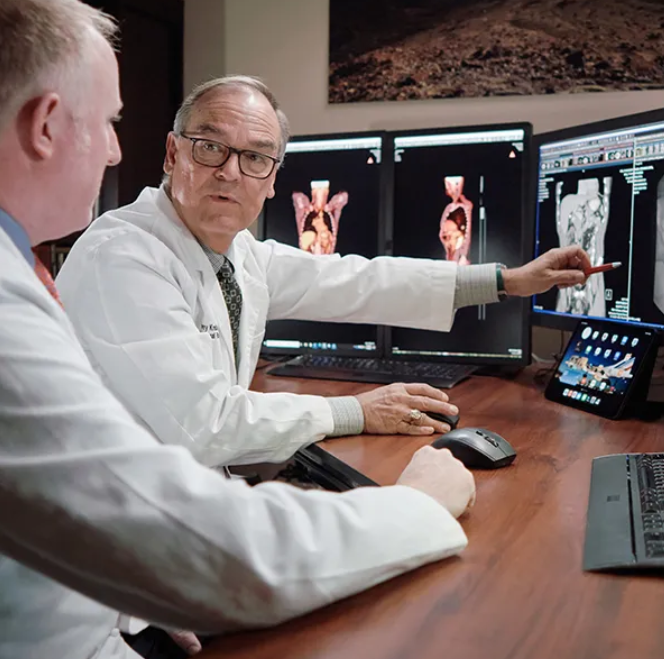

## About Dataset

### Introduction
Cancer continues to be one of the most pressing health challenges worldwide, impacting millions of lives each year. Early and accurate diagnosis is crucial for effective treatment and improved survival rates. In the field of medical diagnostics, machine learning algorithms have emerged as powerful tools to support healthcare professionals in the early detection and classification of diseases, including cancer. 🩺🔬

The Breast Cancer Wisconsin Dataset serves as a benchmark dataset for predictive modeling in cancer diagnosis. By analyzing cell features such as size, shape, and texture, we can develop machine learning models that assist in distinguishing between malignant and benign tumors with high precision. 📊💡

In this notebook, we dive into the application of machine learning algorithms, focusing on feature engineering, visualization, and model building to predict breast cancer outcomes. This approach not only demonstrates the practical utility of data-driven methods in medicine but also underscores the role of technology in transforming healthcare. 🧬📈

### Context

This breast cancer databases was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg.

Attributes 1 through 10 have been used to represent instances. Each instance has one of 2 possible classes: benign or malignant.

### Content

#### Attribute Domain
1.**`Sample code number`**: Unique id to represent each record\
2.**`Clump Thickness`**: Measures uniformity of the cells in the tumor clump.\
3.**`Uniformity of Cell Size`**: Measures uniformity of the cell sizes in the tumor.\
4.**`Uniformity of Cell Shape`**: Measures uniformity of the cell shapes in the tumor.\
5.**`Marginal Adhesion`**: Measures how well cells stick together.\
6.**`Single Epithelial Cell Size`**: Measures the size of single epithelial cells (the cells that line the surfaces of organs).\
7.**`Bare Nuclei`**: Counts the number of nuclei in the cells that lack cytoplasm (bare nuclei).\
8.**`Bland Chromatin`**: Describes the texture and uniformity of the cell nuclei’s chromatin.\
9.**`Normal Nucleoli`**: Measures the number of nucleoli that appear in the nucleus.\
10.**`Mitoses`**: Measures the number of mitotic cells (cells undergoing division).\
11.**`Class`**: The diagnosis of the breast tumor. (2 for benign, 4 for malignant)

### Class distribution:

Benign: 458 (65.5%)
Malignant: 241 (34.5%)



## Aims and Objectives

The aim of this project is to predict whether a patient has breast cancer or not based on the given attributes.\
We will use machine learning algorithms to predict the outcome.


## Import Libraries

Let's start by importing all the necessary libraries.

In [556]:
# Import all necessary libaries

# to handle data
import pandas as pd
import numpy as np

# to plot data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer

# Import IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Machine learning 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# For classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')



## Load dataset

Let's load the dataset and check the first few rows.

In [557]:
# Load the data from the csv file placed locally in our system
df = pd.read_csv('breast_cancer_bd.csv')

# Display the first 5 rows of the dataset
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## EXPLORATORY DATA ANALYSIS (EDA)

### Explore the dataset

In [558]:
# Let's check the shape of the dataset. How many rows and columns are there?

print(f"Shape of the dataset: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Shape of the dataset: (699, 11)
Number of rows: 699
Number of columns: 11


In [559]:
# Let's check the columns of the dataset
df.columns

Index(['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [560]:
# Let's check the data types of the columns
df.dtypes

Sample code number              int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [561]:
# Let's see information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


### Missing Values

In [562]:
# Let's check the missing values in the dataset
df.isnull().sum()


Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [563]:
# print the unique values in the dataset for each column

for col in df.columns:
    print(f"{col}: {df[col].unique()}")
    print()
    


Sample code number: [ 1000025  1002945  1015425  1016277  1017023  1017122  1018099  1018561
  1033078  1035283  1036172  1041801  1043999  1044572  1047630  1048672
  1049815  1050670  1050718  1054590  1054593  1056784  1057013  1059552
  1065726  1066373  1066979  1067444  1070935  1071760  1072179  1074610
  1075123  1079304  1080185  1081791  1084584  1091262  1096800  1099510
  1100524  1102573  1103608  1103722  1105257  1105524  1106095  1106829
  1108370  1108449  1110102  1110503  1110524  1111249  1112209  1113038
  1113483  1113906  1115282  1115293  1116116  1116132  1116192  1116998
  1117152  1118039  1120559  1121732  1121919  1123061  1124651  1125035
  1126417  1131294  1132347  1133041  1133136  1136142  1137156  1143978
  1147044  1147699  1147748  1148278  1148873  1152331  1155546  1156272
  1156948  1157734  1158247  1160476  1164066  1165297  1165790  1165926
  1166630  1166654  1167439  1167471  1168359  1168736  1169049  1170419
  1170420  1171710  1171795  11

### Dealing with column 'Bare Nuclei' 

In [564]:
# Value counts of Bare Nuclei column as their are some values with '?'
df['Bare Nuclei'].value_counts()

Bare Nuclei
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: count, dtype: int64

In [565]:
# Change the '?' to NaN
df['Bare Nuclei'] = df['Bare Nuclei'].replace('?', np.nan)

df['Bare Nuclei'].isnull().sum()

np.int64(16)

As we can see column Bare Nuclei is of object type, we need to convert it to numeric type.

In [566]:
# Convert the column to numeric data type
df['Bare Nuclei'] = df['Bare Nuclei'].astype(float)

# Check the data types of the columns
df.dtypes

Sample code number               int64
Clump Thickness                  int64
Uniformity of Cell Size          int64
Uniformity of Cell Shape         int64
Marginal Adhesion                int64
Single Epithelial Cell Size      int64
Bare Nuclei                    float64
Bland Chromatin                  int64
Normal Nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object

In [567]:
# percentage of missing values in the column 'Bare Nuclei'
percentage_missing_values = df['Bare Nuclei'].isnull().sum() / df.shape[0] * 100
print(f"Percentage of missing values in the column 'Bare Nuclei': {percentage_missing_values:.2f}%")

Percentage of missing values in the column 'Bare Nuclei': 2.29%


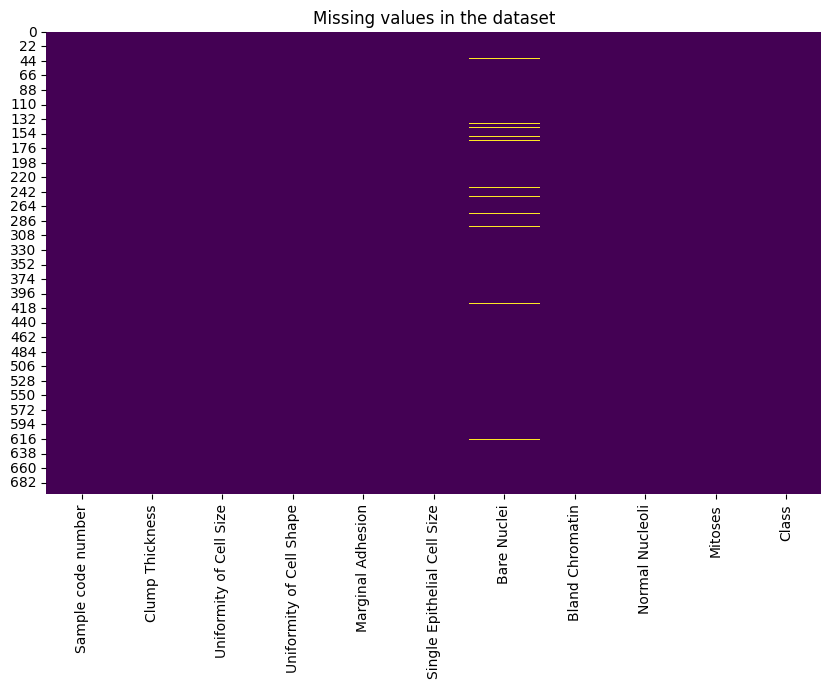

In [568]:
# heatmap of the missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing values in the dataset')
plt.show()

In [569]:
# Let's fill the missing values in the column 'Bare Nuclei' with the iterative imputer
imputer = IterativeImputer()
df['Bare Nuclei'] = imputer.fit_transform(df[['Bare Nuclei']])
df['Bare Nuclei'] = np.round(df['Bare Nuclei'])

df['Bare Nuclei'].isnull().sum()


np.int64(0)

### Duplicate values

let's check for duplicate values in the dataset. If there are any, we will remove them.

In [570]:
# Let's check duplicate rows in the dataset
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 8


In [571]:
# Let's drop the duplicate rows
df = df.drop_duplicates()

# Let's check the shape of the dataset after dropping the duplicate rows
print(f"Shape of the dataset after dropping the duplicate rows: {df.shape}")

Shape of the dataset after dropping the duplicate rows: (691, 11)


### Let Explore each column


In [572]:
# checking the datashape
df.shape

(691, 11)

In [573]:
# df.describe() will give us the statistical summary of the dataset
df.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.910000e+02,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000
mean,1.073333e+06,4.426918,3.130246,3.201158,2.824891,3.211288,3.548480,3.435601,2.882779,1.593343,2.688857
std,6.192953e+05,2.815861,3.041328,2.959886,2.866552,2.199852,3.596118,2.442345,3.066298,1.723129,0.951051
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.725490e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238437e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


#### Clump Thickness


In [574]:
# Clump Thickness column
print("(",df['Clump Thickness'].min(),",",df['Clump Thickness'].max(),")")

( 1 , 10 )


Text(0.5, 1.0, 'Histogram of Clump Thickness')

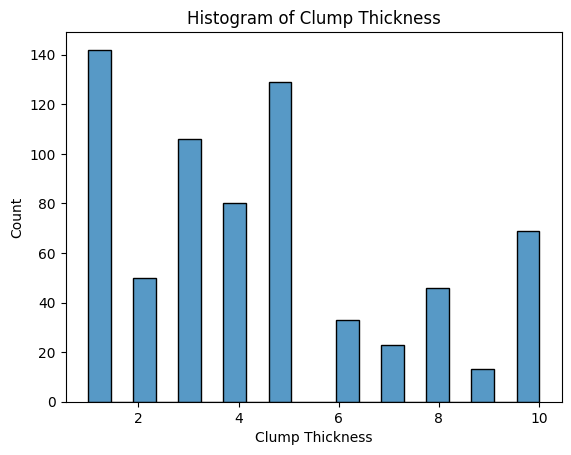

In [608]:

# Draw histogram of the column 'Clump Thickness' using plotly express
fig = px.histogram(df, x='Clump Thickness', nbins=20, title='Histogram of Clump Thickness')
fig.show()

# # Draw histogram of the column 'Clump Thickness' 
# sns.histplot(df['Clump Thickness'], bins=20)
# plt.title('Histogram of Clump Thickness')

#### Uniformity of Cell Size

In [576]:
# Uniformity of Cell Size column
print("(",df['Uniformity of Cell Size'].min(),",",df['Uniformity of Cell Size'].max(),")")

( 1 , 10 )


In [577]:
# Draw histogram of the column 'Uniformity of Cell Size' using plotly express
fig = px.histogram(df, x='Uniformity of Cell Size', nbins=20, title='Histogram of Uniformity of Cell Size')
fig.show()

#### Uniformity of Cell Shape

In [578]:
# Uniformity of Cell Shape column
print("(",df['Uniformity of Cell Shape'].min(),",",df['Uniformity of Cell Shape'].max(),")")

( 1 , 10 )


In [579]:
# Draw histogram of the column 'Uniformity of Cell Size' using plotly express
fig = px.histogram(df, x='Uniformity of Cell Shape', nbins=20, title='Histogram of Uniformity of Cell Shape')
fig.show()

#### Marginal Adhesion

In [580]:
# Marginal Adhesion column
print("(",df['Marginal Adhesion'].min(),",",df['Marginal Adhesion'].max(),")")

( 1 , 10 )


In [581]:
# Draw histogram of the column 'Marginal Adhesion' using plotly express
fig = px.histogram(df, x='Marginal Adhesion', nbins=20, title='Histogram of Marginal Adhesion')
fig.show()

#### Single Epithelial Cell Size

In [582]:
# Single Epithelial Cell Size column
print("(",df['Single Epithelial Cell Size'].min(),",",df['Single Epithelial Cell Size'].max(),")")

( 1 , 10 )


In [583]:
# Draw histogram of the column 'Single Epithelial Cell Size' using plotly express
fig = px.histogram(df, x='Single Epithelial Cell Size', nbins=20, title='Histogram of Single Epithelial Cell Size')
fig.show()

#### Bare Nuclei

In [584]:
# Bare Nuclei column
print("(",df['Bare Nuclei'].min(),",",df['Bare Nuclei'].max(),")")

( 1.0 , 10.0 )


In [585]:
# Draw histogram of the column 'Bare Nuclei' using plotly express
fig = px.histogram(df, x='Bare Nuclei', nbins=20, title='Histogram of Bare Nuclei')
fig.show()

#### Bland Chromatin

In [586]:
# Bland Chromatin column
print("(",df['Bland Chromatin'].min(),",",df['Bland Chromatin'].max(),")")

( 1 , 10 )


In [587]:
# Draw histogram of the column 'Bland Chromatin' using plotly express
fig = px.histogram(df, x='Bland Chromatin', nbins=20, title='Histogram of Bland Chromatin')
fig.show()

#### Normal Nucleoli

In [588]:
# Normal Nucleoli column
print("(",df['Normal Nucleoli'].min(),",",df['Normal Nucleoli'].max(),")")

( 1 , 10 )


In [589]:
# Draw histogram of the column 'Normal Nucleoli' using plotly express
fig = px.histogram(df, x='Normal Nucleoli', nbins=20, title='Histogram of Normal Nucleoli')
fig.show()

#### Mitoses

In [590]:
# Mitoses column
print("(",df['Mitoses'].min(),",",df['Mitoses'].max(),")")

( 1 , 10 )


In [591]:
# Draw histogram of the column 'Mitoses' using plotly express
fig = px.histogram(df, x='Mitoses', nbins=20, title='Histogram of Mitoses')
fig.show()

#### Class

In [592]:
# Class column
print("(",df['Class'].min(),",",df['Class'].max(),")")

( 2 , 4 )


In [593]:
# Draw histogram of the column 'Class' using plotly express
fig = px.histogram(df, x='Class', nbins=4, title='Histogram of Class')
fig.show()

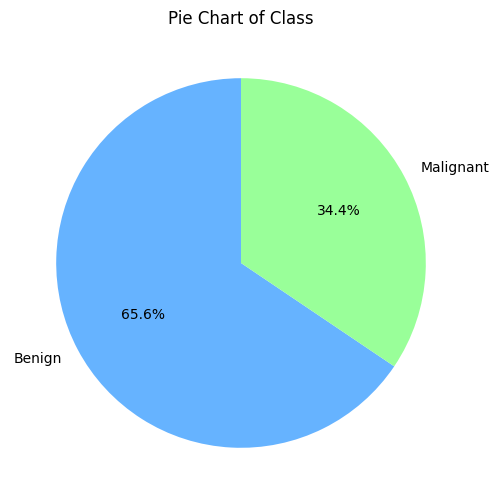

In [613]:
# Pie chart of the column 'Class'
plt.figure(figsize=(10, 6))
df['Class'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99'], labels=['Benign', 'Malignant'])
plt.title('Pie Chart of Class')
plt.ylabel('')
plt.show()

In [594]:
# Percentage of class column data
df['Class'].value_counts(normalize=True) * 100

Class
2    65.557164
4    34.442836
Name: proportion, dtype: float64

### Correlation of Data

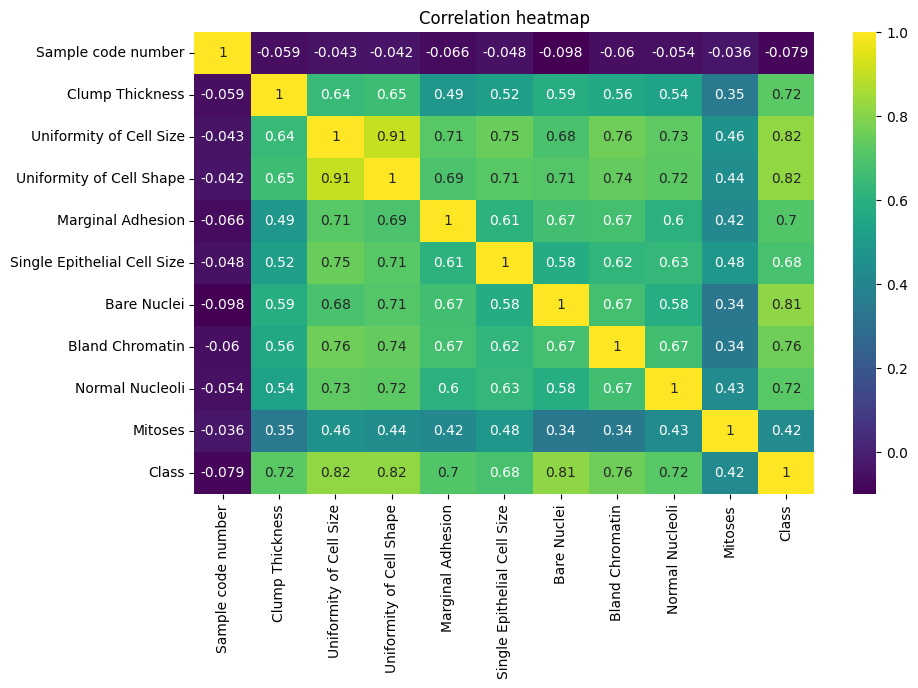

In [595]:
# draw the heatmap  
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title('Correlation heatmap')
plt.show()

- **Positive correlation (close to 1)**: Indicates that as one variable increases, the other also increases.
- **Negative correlation (close to -1)**: Indicates that as one variable increases, the other decreases.
- **No correlation (close to 0)**: Indicates no linear relationship between the variables.

`Class`: The diagnosis of the breast tumor. (2 for benign, 4 for malignant).

As class column represents:
2: Benign (non-cancerous).
4: Malignant (cancerous).

We convert the class column to categorical data type. So that we can easily understand the predicted output.

In [596]:
# convert the class values for 2 Benign and 4 Malignant
df['Class'] = df['Class'].map({2:'Benign', 4:'Malignant'})
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,Benign
1,1002945,5,4,4,5,7,10.0,3,2,1,Benign
2,1015425,3,1,1,1,2,2.0,3,1,1,Benign
3,1016277,6,8,8,1,3,4.0,3,7,1,Benign
4,1017023,4,1,1,3,2,1.0,3,1,1,Benign


## <span style="color:yellow; font-size:150%; font-weight:bold">Machine Learning</span>

Enlist all the models that you will use to predict the heart disease. These models should be classifer for multi-class classification.

1. Logistic regression
2. KNN
3. NB
4. SVM
5. Desicion Tree
6. Random Forest
7. Gradient Boosting
8. AdaBoost


In [597]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 691 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sample code number           691 non-null    int64  
 1   Clump Thickness              691 non-null    int64  
 2   Uniformity of Cell Size      691 non-null    int64  
 3   Uniformity of Cell Shape     691 non-null    int64  
 4   Marginal Adhesion            691 non-null    int64  
 5   Single Epithelial Cell Size  691 non-null    int64  
 6   Bare Nuclei                  691 non-null    float64
 7   Bland Chromatin              691 non-null    int64  
 8   Normal Nucleoli              691 non-null    int64  
 9   Mitoses                      691 non-null    int64  
 10  Class                        691 non-null    object 
dtypes: float64(1), int64(9), object(1)
memory usage: 64.8+ KB


We drop the same code number column as it is not useful for prediction.

In [598]:
df.drop('Sample code number', axis=1, inplace=True)
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,Benign
1,5,4,4,5,7,10.0,3,2,1,Benign
2,3,1,1,1,2,2.0,3,1,1,Benign
3,6,8,8,1,3,4.0,3,7,1,Benign
4,4,1,1,3,2,1.0,3,1,1,Benign


In [599]:
# import all models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB


# import pipeline
from sklearn.pipeline import Pipeline

# import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [600]:
# Split the data into features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [601]:
# creating a list of models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Support Vector Machine', SVC()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Naive Bayes', GaussianNB())
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model in models:
    try:
        # Create a pipeline for each model
        pipeline = Pipeline([
            ('model', model)
        ])

        # Perform cross-validation
        scores = cross_val_score(pipeline, X_train, y_train, cv=5)

        # Calculate mean accuracy
        mean_accuracy = scores.mean()

        # Fit the pipeline on the training data
        pipeline.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = pipeline.predict(X_test)

        # Calculate accuracy score
        accuracy = accuracy_score(y_test, y_pred)

        # Print the performance metrics
        print("Model:", name)
        print("Cross-validation Accuracy:", mean_accuracy)
        print("Test Accuracy:", accuracy)
        print()

        # Check if the current model has the best accuracy
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = pipeline
    except Exception as e:
        print(f"Model {name} encountered an error: {e}")

# Retrieve the best model
print("Best Model:", best_model)


Model: Logistic Regression
Cross-validation Accuracy: 0.9601965601965603
Test Accuracy: 0.9640287769784173

Model: K-Nearest Neighbors
Cross-validation Accuracy: 0.9674692874692875
Test Accuracy: 0.9856115107913669

Model: Support Vector Machine
Cross-validation Accuracy: 0.9674365274365275
Test Accuracy: 0.9640287769784173

Model: Decision Tree
Cross-validation Accuracy: 0.9511547911547911
Test Accuracy: 0.920863309352518

Model: Random Forest
Cross-validation Accuracy: 0.9602129402129403
Test Accuracy: 0.9640287769784173

Model: AdaBoost
Cross-validation Accuracy: 0.9602293202293202
Test Accuracy: 0.9424460431654677

Model: Gradient Boosting
Cross-validation Accuracy: 0.9656674856674856
Test Accuracy: 0.9568345323741008

Model: Naive Bayes
Cross-validation Accuracy: 0.9584111384111385
Test Accuracy: 0.9640287769784173

Best Model: Pipeline(steps=[('model', KNeighborsClassifier())])


In [602]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,Benign
1,5,4,4,5,7,10.0,3,2,1,Benign
2,3,1,1,1,2,2.0,3,1,1,Benign
3,6,8,8,1,3,4.0,3,7,1,Benign
4,4,1,1,3,2,1.0,3,1,1,Benign


In [603]:
# Test the model random data
print("Testing using Known points: ",best_model.predict([[5,1,1,1,2,1.0,3,1,1]]))

# Test the model random data
print("Testing using Unknown points: ",best_model.predict([[2,3,1,2,5,2.0,2,1,2]]))

Testing using Known points:  ['Benign']
Testing using Unknown points:  ['Benign']


In [604]:
# Saving the best model
import pickle

# Save the best model
pickle.dump(best_model, open('Breast_Cancer_model_Predictor.pkl', 'wb'))

In [605]:
# Load the model
model = pickle.load(open('Breast_Cancer_model_Predictor.pkl', 'rb'))

In [606]:
# Test the model random data
print("Testing using Known points: ",model.predict([[5,1,1,1,2,1.0,3,1,1]]))

# Test the model random data
print("Testing using Unknown points: ",model.predict([[2,3,1,2,5,2.0,2,1,2]]))

Testing using Known points:  ['Benign']
Testing using Unknown points:  ['Benign']


## Output:

1. Orginally data set has 699 rows and 11 columns, when we checked the data there are 8 records which are twice in the data set. After removing the duplicate records, the data set has 691 rows and 11 columns.

2. The Bare Nuclei column has 16 missing values which are represented by '?'.

3. As we see the 'Sample code number' column shows unique id for each record, which reduces the accuracy of the model. So, we drop the column.

4. In value range of each column is in between (1-10).

5. The 'Class' column is the target column which we need to predict. The column has 2 unique values 2 and 4. We convert the column to categorical data type.
    2 = Benign (non-cancerous)\
    4 = Malignant (cancerous)

6. From all tested Machine Learning models, the best model is KNN with Cross-validation Accuracy: 0.97% and Test Accuracy: 0.98%.

7. We tested our model with known parameters and unknown parameters and we got the correct result. The model is working fine.

8. The model is ready to predict the breast cancer.

Predicting the breast cancer using the following parameters:

['Clump Thickness' : 2, 'Uniformity of Cell Size': 3,  'Uniformity of Cell Shape' : 1, 'Marginal Adhesion' : 2, 'Single Epithelial Cell Size' : 5, 'Bare Nuclei' : 2.0, 'Bland Chromatin' : 2, 'Normal Nucleoli' : 1, 'Mitoses' : 2]

With these parameters we predicted that the breast cancer is Benign. Means the patient have no brest cancer.


## Conclusion

We have successfully built a model to predict breast cancer. The model is working fine with the given data. We can use this model to predict breast cancer in patients.

By analyzing key cell features, we successfully built a model that can assist in early and accurate cancer diagnosis, potentially improving patient outcomes. This work highlights the importance of data-driven approaches in advancing healthcare and supporting medical decision-making.

